# INSTALL LIBRARIES

In [1]:
!pip install mlflow==2.13.2 sagemaker-mlflow==0.1.0

  Using cached mlflow-2.13.2-py3-none-any.whl.metadata (29 kB)
  Using cached sagemaker_mlflow-0.1.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached graphene-3.3-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached opentelemetry_api-1.25.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached opentelemetry_sdk-1.25.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl.metadata (559 bytes)
  Using cached gunicorn-22.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached graphql_core-3.2.3-py3-none-any.whl.metadata (10 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached aniso8601-9.0.1-py2.py3-none-any.whl.metadata (23 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached opentelemetry_semantic_conventions-0.46b0-py3-none-any.whl.metadata (2.3 kB)
Using cached mlflow-2.13.2-py3-none-any.whl (25.0 MB)
Using cached s

# LOAD LIBRARIES

In [2]:
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# SETTINGS

In [3]:
mlflow_arn = "arn:aws:sagemaker:eu-west-1:211125740051:mlflow-tracking-server/Sample-server"

# SET THE ARN

In [4]:
mlflow.set_tracking_uri(mlflow_arn)

# INITIATE AUTOLOG

In [5]:
mlflow.autolog()

2024/07/03 08:20:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


# BUILD A MODEL

In [6]:
db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)
# MLflow triggers logging automatically upon model fitting
rf.fit(X_train, y_train)

2024/07/03 08:20:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '29043ec7fa2043378a630bf95650201b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/03 08:20:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."


RandomForestRegressor(max_depth=6, max_features=3)

We didn't specify the experiment, therefore the run has been saved in Default experiment
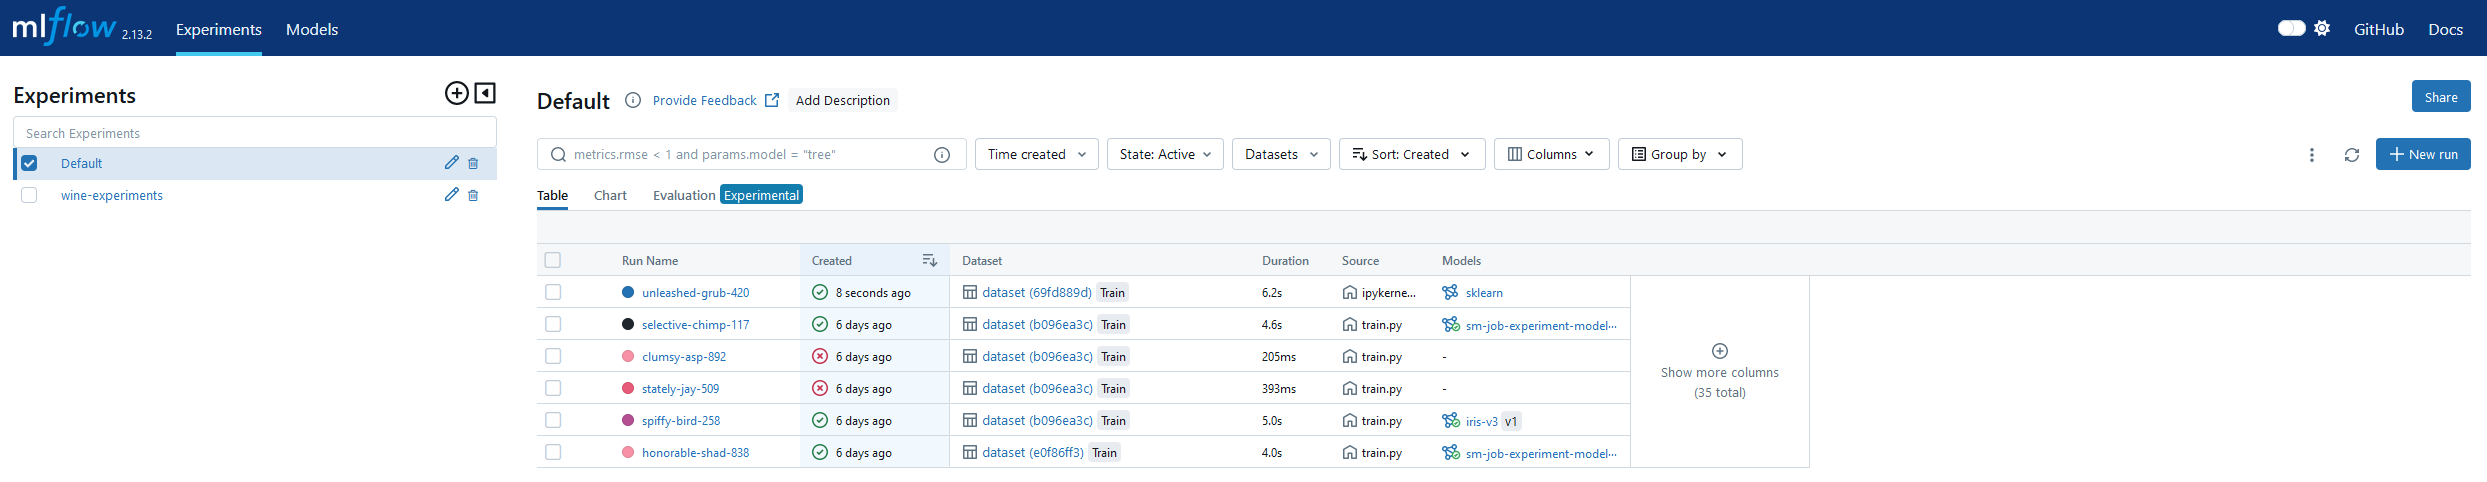

# SPECIFY THE EXPERIMENT

In [12]:
mlflow.set_experiment("my-sample-experiment")

<Experiment: artifact_location='s3://sagemaker-bucket-ds/ML_FLOW/34', creation_time=1719994973982, experiment_id='34', last_update_time=1719994973982, lifecycle_stage='active', name='my-sample-experiment', tags={}>

# BUILD SOME MODELS

In [8]:
db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

rf = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=3)
# MLflow triggers logging automatically upon model fitting
rf.fit(X_train, y_train)

2024/07/03 08:23:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '63e6e19d68054913ab2a7798bcc7c622', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


RandomForestRegressor(max_depth=4, max_features=3)

In [20]:
rf = RandomForestRegressor(n_estimators=100, max_depth=2, max_features=3)
rf.fit(X_train, y_train)

2024/07/03 08:47:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f5da1823f8d2450893b14494d16c63c4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


RandomForestRegressor(max_depth=2, max_features=3)

The run has been save in experiment "my-sample-experiment"
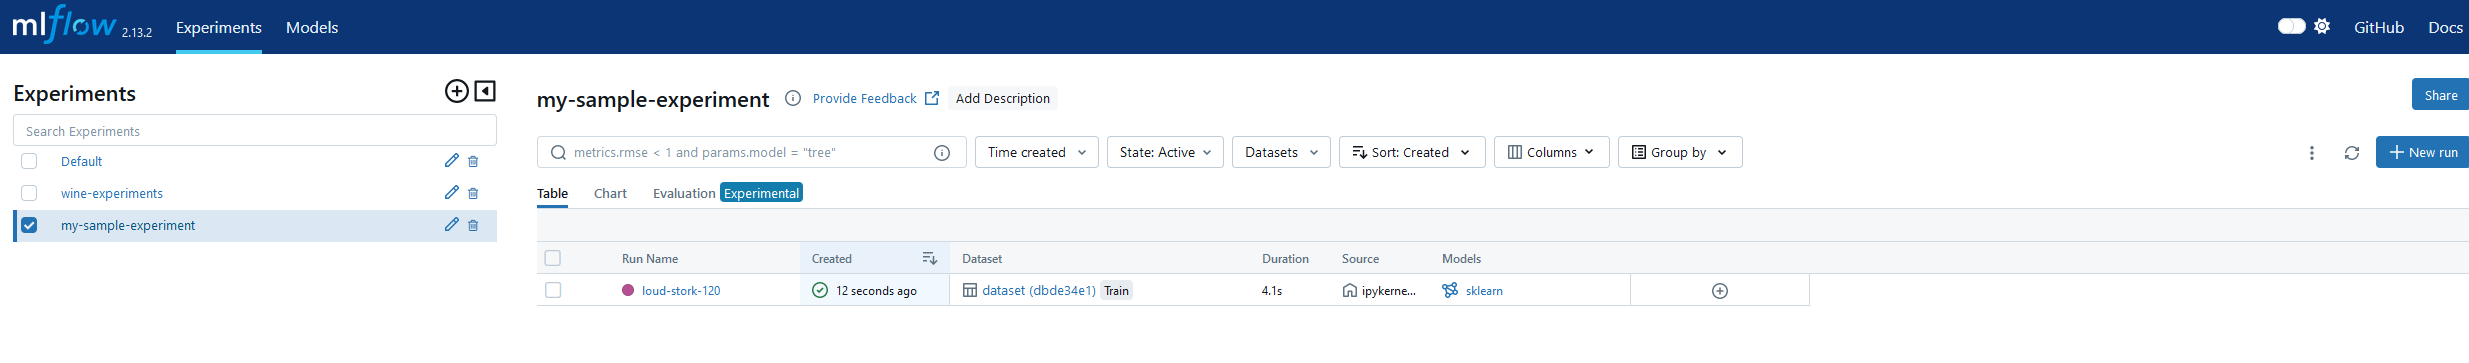